In [2]:
import numpy as np
import pandas as pd

############################    IMPORTING DATA:

import os
#print(os.getcwd())   # this will help you to get the current directory that Python is at

In [3]:
###############  CSV DATA

data = pd.read_csv (r"C:\Data\midterm_marks")
data.columns = ['Obs', 'mark'] # changing the columns' name
print (data)  #the original names have been changed

    Obs  mark
0     1  15.0
1     2  18.0
2     3  27.0
3     4  20.0
4     5  15.0
..  ...   ...
93   94   7.0
94   95  24.0
95   96   6.5
96   97  22.0
97   98  27.5

[98 rows x 2 columns]


In [4]:
import numpy as np
import pandas as pd
from statistics import mean
from statistics import median
from statistics import variance
data = pd.read_csv (r"C:\Data\midterm_marks")
data.columns = ['Obs', 'mark'] # changing the columns' name

mean(data['mark'])
median(data['mark'])
variance(data['mark'])
np.quantile(data['mark'],0.25)
np.quantile(data['mark'],0.5)
np.quantile(data['mark'],0.75)
min(data['mark'])
max(data['mark'])
print('min: ',min(data['mark']) , "\n", 'Q1: ', np.quantile(data['mark'],0.25), 
      "\n", 'mean: ',mean(data['mark']), "\n",  'Q2: ',median(data['mark']),  
      "\n",'Q3: ',np.quantile(data['mark'],0.75),  "\n",'max: ', max(data['mark']),
     "\n", 'range: ',min(data['mark']), max(data['mark']) )

min:  0.5 
 Q1:  12.125 
 mean:  17.5 
 Q2:  18.25 
 Q3:  24.0 
 max:  28.0 
 range:  0.5 28.0


In [10]:
import statistics as st
from statistics import variance
variance(data['mark'])
st.stdev(data['mark']) #standard deviation 
q75, q25 = np.percentile((data['mark']), [75 ,25])
iqr = q75 - q25

print('var: ', variance(data['mark']), '\n','sd: ', st.stdev(data['mark']), '\n','IQR: ', iqr)

var:  53.8041237113402 
 sd:  7.335129427034005 
 IQR:  11.875


In [5]:
x = data['mark']
n = len(x)
y = [0]*n
z = [0]*n
for i in range(n):
    y[i] = (x[i] - mean(x))**2
    z[i] = (x[i] - mean(x))**3    
m2 = mean(y)  
m3 = mean(z)


In [6]:
x = data['mark']
y = [0]*n
z = [0]*n
def skew(x):
    n = len(x)
    for i in range(n):
        y[i] = (x[i] - mean(x))**2
        z[i] = (x[i] - mean(x))**3    
    m2 = mean(y)  
    m3 = mean(z)
    sk = (m3/pow(m2,3/2))*pow(n*(n-1),1/2)/(n-2)
    return(sk)
    
print(skew(data['mark']))

-0.42051131675022363


In [7]:
def kurt(x):
    n = len(x)
    for i in range(n):
        y[i] = (x[i] - mean(x))**2
        z[i] = (x[i] - mean(x))**4    
    m2 = mean(y)  
    m4 = mean(z)
    kur =  (n-1)/((n-2)*(n-3))*((n+1)*m4/(m2**2) - 3*(n-1))    
    return(kur)
    
print(kurt(data['mark']))

-0.6471976744377083


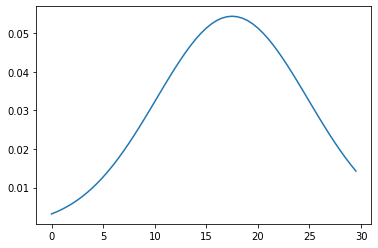

In [11]:
import scipy.stats as scst
import matplotlib.pyplot as plt
l = list(np.arange(0,30,0.5))
y = scst.norm.pdf(l,loc = mean(x),scale = st.stdev(x)) # this equivalent to qnorm in R
#print(y)
plt.plot(l, y)


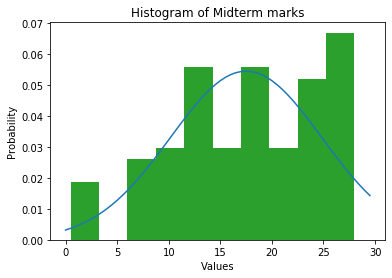

In [17]:
import scipy.stats as scst
import matplotlib.pyplot as plt
l = list(np.arange(0,30,0.5))
y = scst.norm.pdf(l,loc = mean(x),scale = st.stdev(x)) # this equivalent to qnorm in R
#print(y)
plt.plot(l, y)
plt.hist(data['mark'], bins=None, range=None, density=True, color='C2')
plt.title('Histogram of Midterm marks') 
plt.xlabel('Values') 
plt.ylabel('Probability') 
plt.show()

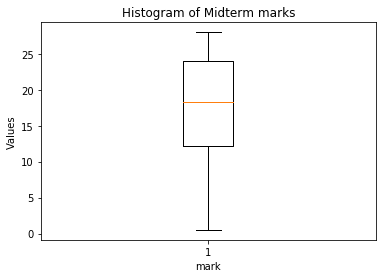

In [11]:
import matplotlib.pyplot as plt
plt.boxplot(data['mark'])
plt.title('Histogram of Midterm marks') 
plt.xlabel('mark') 
plt.ylabel('Values') 
plt.show()

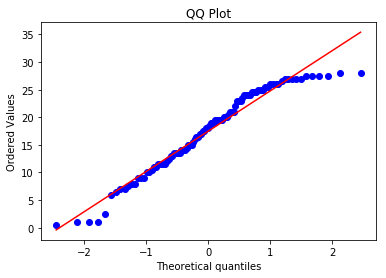

In [12]:

import pylab 
import scipy.stats as scst
  
scst.probplot(x, dist="norm", plot=pylab)
pylab.title('QQ Plot') 
pylab.show()

In [13]:
import pandas as pd
import scipy.stats as scst
midterm = pd.read_csv (r"C:\Data\midterm_marks")
midterm.columns = ['Obs', 'M']
final = pd.read_csv (r"C:\Data\final_marks")
final.columns =  ['Obs', 'F']
scst.pearsonr(midterm['M'], final['F'])    #OR

import numpy as np
np.corrcoef(midterm['M'], final['F'])[0, 1]

0.7778647904098349

In [16]:
import matplotlib.pyplot as plt

plt.scatter(midterm['M'], final['F'],label='Scatter Plot 1',color='b')  
pyplot.xlabel('Midterm') 
pyplot.ylabel('Final') 
pyplot.title('Scatter Plot of Midterm and Final Marks') 
pyplot.show() 

NameError: name 'pyplot' is not defined

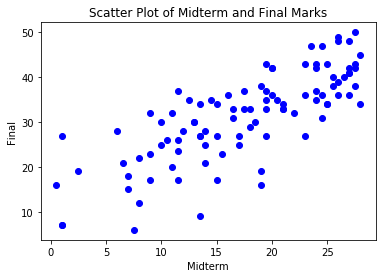

In [17]:
import matplotlib.pyplot as plt

plt.scatter(midterm['M'], final['F'],label='Scatter Plot 1',color='b')  
plt.xlabel('Midterm') 
plt.ylabel('Final') 
plt.title('Scatter Plot of Midterm and Final Marks') 
plt.show() 

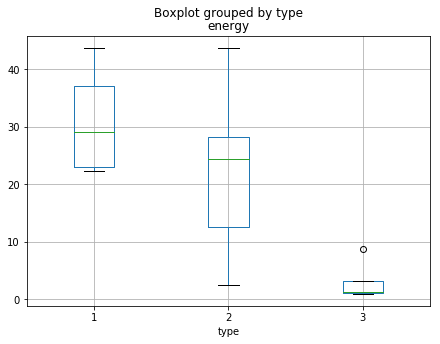

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
bats = pd.read_csv('C:/Data/bats.csv')
fig, ax = plt.subplots(figsize=(7,5))
bats.boxplot(column=['energy'], by='type', ax=ax)#, color = 'b')

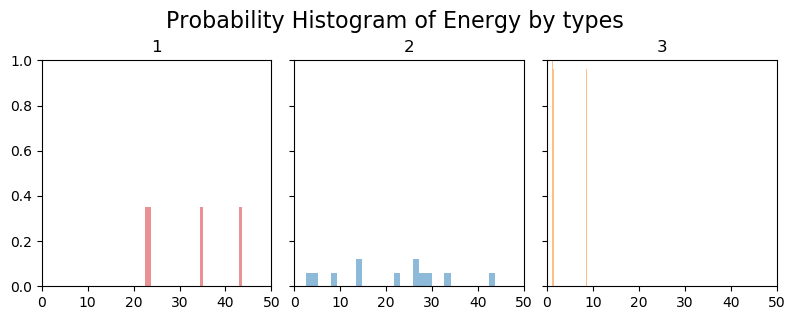

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(8,3), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:blue', 'tab:orange']

for i, (ax, type) in enumerate(zip(axes.flatten(), bats.type.unique())):
    x = bats.loc[bats.type==type, 'energy']
    ax.hist(x, alpha=0.5, bins=30, density=True, stacked=True, label=str(type), color=colors[i])
    ax.set_title(type)

plt.suptitle('Probability Histogram of Energy by types', y=1.05, size=16)
ax.set_xlim(0, 50); ax.set_ylim(0, 1);
plt.tight_layout();